# 作业1：Numpy练习

本次作业主要对Python中的矩阵运算库Numpy进行练习。如遇到不清楚的函数或主题，可以查阅[官方文档](https://numpy.org/doc/stable/user/index.html)或利用搜索引擎寻求帮助。

### 基础知识

本节对Numpy进行简要介绍，没有实际的题目，可直接运行每一个单元格。

首先导入Numpy包：

In [11]:
import numpy as np

利用Numpy可以方便地创建向量和矩阵：

In [12]:
vec = np.array([1.0, 2.0, 5.0])
print(vec)

[1. 2. 5.]


In [13]:
mat = np.array([[1.0, 2.0, 2.0], [3.0, 5.0, 4.5]])
print(mat)

[[1.  2.  2. ]
 [3.  5.  4.5]]


In [14]:
vec = np.linspace(start=1.0, stop=5.0, num=12)
print(vec)

[1.         1.36363636 1.72727273 2.09090909 2.45454545 2.81818182
 3.18181818 3.54545455 3.90909091 4.27272727 4.63636364 5.        ]


In [15]:
mat = np.reshape(vec, (3, 4))
print(mat)

[[1.         1.36363636 1.72727273 2.09090909]
 [2.45454545 2.81818182 3.18181818 3.54545455]
 [3.90909091 4.27272727 4.63636364 5.        ]]


Python中下标是从0开始的，请一定要记住这一点，否则会造成很多逻辑错误。

In [16]:
print(vec[0])
print(vec[2])
print(mat[1, 1])

1.0
1.7272727272727273
2.8181818181818183


负数的下标表示从尾部往前数：

In [17]:
print(vec[-1])
print(vec[-2])
print(mat[1, -1])

5.0
4.636363636363637
3.5454545454545454


可以用冒号选取向量中的一段范围，格式为`x[start:end]`，选出的元素包含`x[start]`，不包含`x[end]`。

In [18]:
print(vec[1:3])

[1.36363636 1.72727273]


In [19]:
print(mat[:, :2])

[[1.         1.36363636]
 [2.45454545 2.81818182]
 [3.90909091 4.27272727]]


在编写函数时，经常需要各种测试数据，此时可以用Numpy来生成各类随机数。在需要用到随机数之前，一定要先设置随机数种子，以使结果可重复。

In [20]:
np.random.seed(123)

生成均匀分布随机数：

numpy.random.uniform 用于在均匀分布中生成样本，即在半开放区间[low,high)中抽取样本。


In [21]:
unif = np.random.uniform(low=0.0, high=1.0, size=5)
print(unif)

[0.69646919 0.28613933 0.22685145 0.55131477 0.71946897]


正态分布随机数：

numpy.random.normal 用于在正太分布中生成样本，loc代表均值，scale表示方差，size表示正常的array形式。

In [22]:
norm = np.random.normal(loc=0.0, scale=1.0, size=(2, 5))
print(norm)

[[ 0.32210607 -0.05151772 -0.20420096  1.97934843 -1.61930007]
 [-1.11396442 -0.44744072  1.66840161 -0.14337247 -0.6191909 ]]


Numpy提供了许多数学函数对向量和矩阵进行操作：

In [23]:
print(np.exp(norm))

[[1.38003115 0.94978682 0.81529851 7.23802539 0.19803726]
 [0.32825504 0.63926211 5.30368367 0.86643129 0.53837986]]


In [24]:
print(np.log(unif))

[-0.36173173 -1.2512764  -1.48345987 -0.59544936 -0.32924188]


也可以对向量和矩阵进行汇总：

In [25]:
np.sum(unif)

2.4802437129808985

In [26]:
np.mean(norm)

-0.02291311494411293

汇总可以按行或者按列进行，这由`axis`参数决定。0表示运算时第一个维度（行）在变化，1表示运算时第二个维度（列）在变化。
再次提醒，Python中以0表示第一个元素！

In [27]:
print(norm)
np.mean(norm, axis=0)  # 对第一个维度（行标在变化）求均值

[[ 0.32210607 -0.05151772 -0.20420096  1.97934843 -1.61930007]
 [-1.11396442 -0.44744072  1.66840161 -0.14337247 -0.6191909 ]]


array([-0.39592917, -0.24947922,  0.73210032,  0.91798798, -1.11924548])

In [28]:
np.var(norm, axis=1)  # 对第二个维度（列标在变化）求方差

array([1.33033757, 0.90853666])

### 第1题

(a) 生成10000个服从(0, 1)间均匀分布的随机数，赋值给变量`x`，并打印其**前10个**元素。

In [39]:
hw_array = np.random.uniform(low=0, high=1, size=10000)
print(hw_array[:10])

[0.04621222 0.149207   0.09195376 0.1260362  0.47466339 0.10981445
 0.14371574 0.30696156 0.54390228 0.7349922 ]


(b) 创建向量`y`，令其在数学上等于`y=-log(x)`，其中`log`为自然对数。打印`y`的**最后10个**元素。

In [40]:
y = - np.log(unif_array)
print(y[-10:-1])

[2.18337677 0.38918488 0.04549355 0.03660952 1.04139975 1.00351192
 0.60518337 0.69886771 1.69003286]


(c) 查找在Python中绘制图形的方法，绘制`y`的直方图。

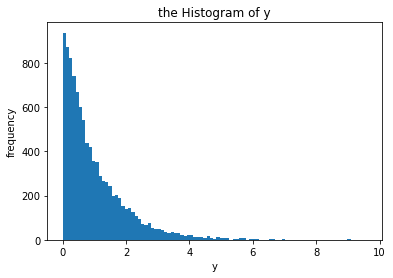

In [41]:
import matplotlib.pyplot as plt
plt.hist(y,bins='auto')
plt.title("the Histogram of y")
plt.ylabel("frequency")
plt.xlabel("y")
plt.show()
# np.histogram(y)

(d) 猜测或证明`y`服从什么分布，并简要说明理由。

答：$y$服从参数为1的指数分布，即$y\sim{Exp(1), y\geqslant{0}}$。因为$x$服从$(0,1)$间的均匀分布，所以$x$的密度函数为$P_X(x)=1, 0\leqslant{x}\leqslant{1}$，又因为$y=-log(x)$为严格单调减函数，其反函数$x=e^{-y}$有连续的导数，则$y$的密度函数为
$$P_Y(y)=\begin{cases}
P_X(e^{-y})\lvert{(e^{-y})^{'}}\rvert,  & \text{$y\gt{0}$} \\
0, & \text{其他}
\end{cases}$$
化简后得到$P_Y(y)=e^{-y}, y\gt{0}$。根据密度函数，我们可以得到$y$应该服从指数分布，即$y\sim{Exp(1), y\geqslant{0}}$。

### 第2题

(a) 考虑Sigmoid函数 $$\sigma(x)=\frac{e^x}{1+e^x}$$

请在Python中编写一个函数`sigmoid(x)`，令其可以接收一个向量`x`，返回Sigmoid函数在`x`上的取值。

In [33]:
def sigmoid(x):
    return np.exp(x)/(1+np.exp(x))

(b) 创建向量`x`，使其包含元素-1000, -100, -10, 0, 10, 100, 1000。在`x`上调用上面编写的函数，返回的结果是什么？是否出现警告或错误？

In [34]:
x = np.array([-1000, -100, -10, 0, 10, 100, 1000])
sigmoid(x)

<ipython-input-33-cd20c5993b93>:2: RuntimeWarning: overflow encountered in exp
  return np.exp(x)/(1+np.exp(x))
<ipython-input-33-cd20c5993b93>:2: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x)/(1+np.exp(x))


array([0.00000000e+00, 3.72007598e-44, 4.53978687e-05, 5.00000000e-01,
       9.99954602e-01, 1.00000000e+00,            nan])

(c) 如果出现警告或错误，思考可能的原因是什么。（提示：Sigmoid函数真实的取值范围是多少？分子和分母的取值范围又是什么？是否可以对Sigmoid函数的表达式进行某种等价变换？）如果一切正常，可忽略此问题。

“overflow encountered in exp，由于e的1000次方过大，导致数值溢出。由于np.exp()对负数没有限制，因此在处理正数时，我们可以考虑将Sigmoid函数的形式变换为 $$\sigma(x)=\frac{1}{1+e^{-x}}$$对于负数，保持上面的函数形式。

(d) 请再次尝试编写`sigmoid(x)`函数，使其在给定的数据上顺利计算结果。可在网上搜索相关主题寻求帮助，但需给出来源。如果之前一切正常，可忽略此问题。

In [42]:
def sigmoid(x):
    x_ravel = x.ravel() 
    y = []
    for index in range(len(x_ravel)):
        if x_ravel[index] >= 0:
            y.append(1.0 / (1 + np.exp(-x_ravel[index])))
        else:
            y.append(np.exp(x_ravel[index]) / (np.exp(x_ravel[index]) + 1))
    return np.reshape(np.array(y), x.shape)

sigmoid(x)

array([0.00000000e+00, 3.72007598e-44, 4.53978687e-05, 5.00000000e-01,
       9.99954602e-01, 1.00000000e+00, 1.00000000e+00])

### 第3题

(a) 考虑Softplus函数 $$\mathrm{softplus}(x)=\log(1+e^x)$$

请在Python中编写一个函数`softplus(x)`，令其可以接收一个向量`x`，返回Softplus函数在`x`上的取值。

In [43]:
def softplus(x):
    return np.log(1+np.exp(x))

(b) 创建向量`x`，使其包含元素-1000, -100, -10, 0, 10, 100, 1000。在`x`上调用上面编写的函数，返回的结果是什么？是否出现警告或错误？

In [44]:
x = np.array([-1000, -100, -10, 0, 10, 100, 1000])
softplus(x)

<ipython-input-43-57c121eb77c1>:2: RuntimeWarning: overflow encountered in exp
  return np.log(1+np.exp(x))


array([0.00000000e+00, 0.00000000e+00, 4.53988992e-05, 6.93147181e-01,
       1.00000454e+01, 1.00000000e+02,            inf])

(c) 如果出现警告或错误，参照第2题的方法，思考可能的原因是什么。如果一切正常，可忽略此问题。

exp函数由于参数过大导致数值溢出。

(d) 请再次尝试编写`softplus(x)`函数，使其在给定的数据上顺利计算结果。可在网上搜索相关主题寻求帮助，但需给出来源。如果之前一切正常，可忽略此问题。

In [45]:
def softplus(x):
    # 如果遇到多维数组，先将其形式变为一维
    x_ravel = x.ravel() 
    y = []
    for xi in x_ravel:
        if xi >= 0:
            y.append(xi + np.log(1+np.exp(-xi)))
        else:
            y.append(np.log(1+np.exp(xi)))
    # 将参数重新变回原有的形状
    # return np.array(y).reshape(x.shape)
    return np.reshape(np.array(y), x.shape)

x = np.array([-1000, -100, -10, 0, 10, 100, 1000])
softplus(x)

array([0.00000000e+00, 0.00000000e+00, 4.53988992e-05, 6.93147181e-01,
       1.00000454e+01, 1.00000000e+02, 1.00000000e+03])